In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
t=pd.read_csv(r"E:\test_matches_records.csv")
t.shape

(107, 17)

In [3]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     107 non-null    int64  
 1   Names          107 non-null    object 
 2   Country        107 non-null    object 
 3   Span           107 non-null    object 
 4   Matches        107 non-null    object 
 5   Innings        107 non-null    int64  
 6   Not Outs       107 non-null    int64  
 7   Total Runs     107 non-null    int64  
 8   Highest Score  107 non-null    object 
 9   Average        107 non-null    float64
 10  Fours          107 non-null    object 
 11  Balls_Faced    107 non-null    object 
 12  Strike Rate    107 non-null    float64
 13  Hundreds       107 non-null    int64  
 14  Fifty          107 non-null    int64  
 15  Zeroes         107 non-null    int64  
 16  Sixes          107 non-null    object 
dtypes: float64(2), int64(7), object(8)
memory usage: 14.3+

In [4]:
t.drop(t.columns[0], axis=1,inplace=True)

In [5]:
t.describe()

,Innings,Not Outs,Total Runs,Average,Strike Rate,Hundreds,Fifty,Zeroes
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.00000,107.000000,107.000000
mean,179.177570,15.757009,7497.317757,45.976449,50.742150,20.11215,35.186916,11.579439
std,43.886391,8.619680,2240.666493,8.073584,8.942216,8.30586,11.348785,3.995369
min,80.000000,2.000000,5062.000000,30.300000,35.260000,4.00000,13.000000,4.000000
25%,146.500000,10.000000,5740.500000,41.870000,44.590000,14.00000,27.000000,9.000000
50%,177.000000,14.000000,7142.000000,44.790000,49.500000,19.00000,33.000000,12.000000
75%,199.000000,20.000000,8563.000000,50.020000,54.510000,24.00000,40.500000,14.000000
max,329.000000,49.000000,15921.000000,99.940000,82.230000,51.00000,68.000000,22.000000


In [6]:
t.duplicated().sum()

0

In [7]:
t.isnull().sum()

Names            0
Country          0
Span             0
Matches          0
Innings          0
Not Outs         0
Total Runs       0
Highest Score    0
Average          0
Fours            0
Balls_Faced      0
Strike Rate      0
Hundreds         0
Fifty            0
Zeroes           0
Sixes            0
dtype: int64

In [8]:
t.head()

,Names,Country,Span,Matches,Innings,Not Outs,Total Runs,Highest Score,Average,Fours,Balls_Faced,Strike Rate,Hundreds,Fifty,Zeroes,Sixes
0,SR Tendulkar,IND,1989-2013,200,329,33,15921,248*,53.78,2058+,29437+,54.04,51,68,14,69
1,RT Ponting,AUS,1995-2012,168,287,29,13378,257,51.85,1509,22782,58.72,41,62,17,73
2,JH Kallis,SA,1995-2013,166,280,40,13289,224,55.37,1488,28903,45.97,45,58,16,97
3,R Dravid,IND,1996-2012,164,286,32,13288,270,52.31,1654,31258,42.51,36,63,8,21
4,AN Cook,ENG,2006-2018,161,291,16,12472,294,45.35,1442,26562,46.95,33,57,9,11


### Country-wise Analysis:

In [9]:
t['Matches'] = t['Matches'].str.replace('*', '').astype(int)

# Check the data type of 'Total Runs' column
if t['Total Runs'].dtype == 'O':
    # If 'Total Runs' is already of string type, just replace '*'
    t['Total Runs'] = t['Total Runs'].str.replace('*', '')
country_analysis = t.groupby('Country').agg({
    'Matches': 'sum',
    'Innings':'sum',
    'Total Runs': 'sum',
    'Average': 'mean',
    'Strike Rate': 'mean',
    'Hundreds': 'sum',
    'Fifty': 'sum',
    'Zeroes': 'sum'
}).reset_index()
print("\nCountry-wise Analysis:")
print(country_analysis)


Country-wise Analysis:
  Country  Matches  Innings  Total Runs    Average  Strike Rate  Hundreds  \
0     AUS     2127     3641      160510  50.417143    52.341429       480   
1     BAN      158      297       10810  38.490000    53.025000        20   
2     ENG     2439     4268      174601  45.018333    47.299583       448   
3     IND     1578     2604      109441  45.080000    53.423077       298   
4      NZ      655     1142       45550  43.075714    49.735714       111   
5     PAK      805     1348       58485  47.983750    49.441250       162   
6      SA      945     1579       64919  44.545000    50.212500       176   
7      SL     1110     1914       78438  44.068182    52.547273       201   
8      WI     1389     2379       99459  45.442308    51.623077       256   

   Fifty  Zeroes  
0    714     236  
1     58      23  
2    851     258  
3    508     159  
4    213      81  
5    278     101  
6    301     102  
7    362     129  
8    480     150  


C:\Users\ankit\AppData\Local\Temp\ipykernel_4372\2458845488.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t['Matches'] = t['Matches'].str.replace('*', '').astype(int)


### Continent wise Analysis 

In [10]:
continent_mapping = {'IND': 'Asia', 'AUS': 'Australia', 'SA': 'Africa', 'ENG': 'Europe', 'SL': 'Asia', 'WI': 'North America', 'PAK': 'Asia', 'NZ': 'Oceania', 'BAN': 'Asia'}
t['Continent'] = t['Country'].map(continent_mapping)
# Group by Continent and sum the total runs
continent_runs = t.groupby('Continent')[['Matches','Total Runs',"Hundreds","Fifty"]].sum()
# Display the total runs for each continent
print(continent_runs)

               Matches  Total Runs  Hundreds  Fifty
Continent                                          
Africa             945       64919       176    301
Asia              3651      257174       681   1206
Australia         2127      160510       480    714
Europe            2439      174601       448    851
North America     1389       99459       256    480
Oceania            655       45550       111    213


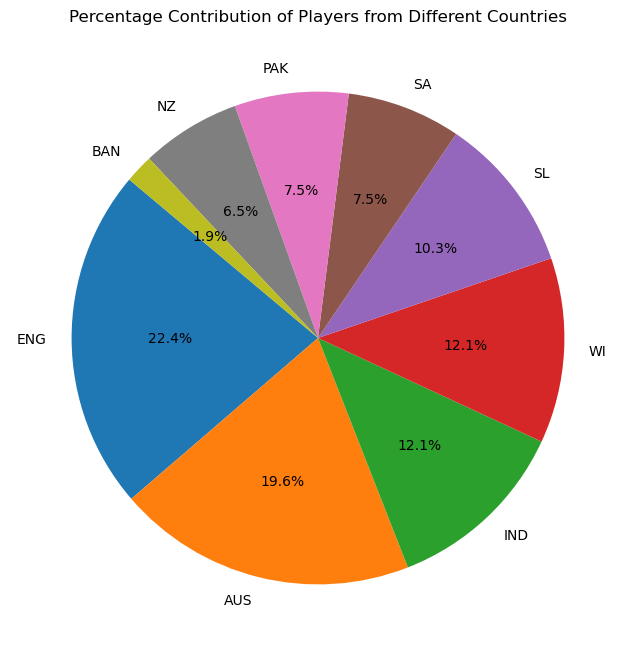

In [11]:
country_counts = t['Country'].value_counts()
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution of Players from Different Countries')
plt.show()


C:\Users\ankit\AppData\Local\Temp\ipykernel_4372\2145448884.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Average', data=t, ci=None, palette='muted')


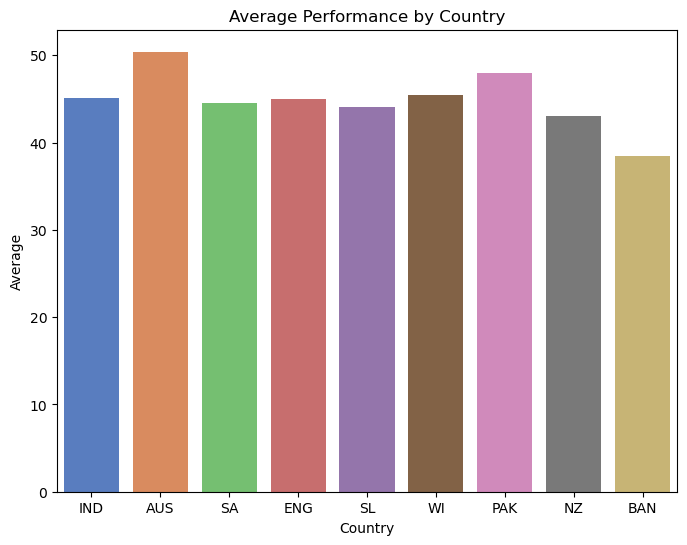

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Country', y='Average', data=t, ci=None, palette='muted')
plt.title('Average Performance by Country')
plt.show()

### Top 10 hightest run getters

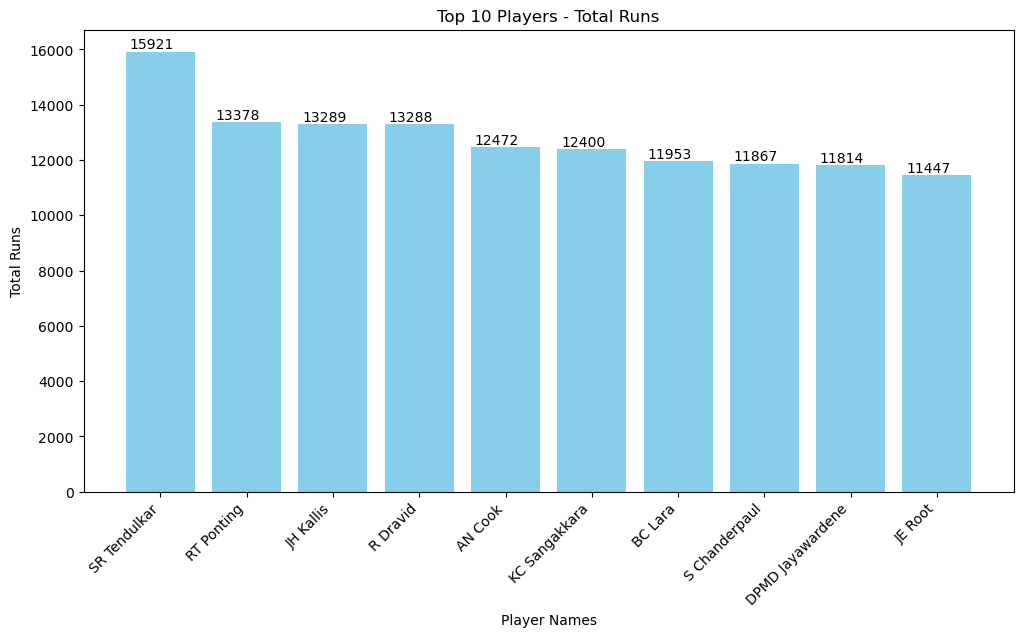

In [13]:

top_players = t[['Names', 'Total Runs']].head(10)

# Plotting a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(top_players['Names'], top_players['Total Runs'], color='skyblue')
plt.xlabel('Player Names')
plt.ylabel('Total Runs')
plt.title('Top 10 Players - Total Runs')
plt.xticks(rotation=45, ha='right') 

# Annotating each bar with the Total Runs value
for bar, runs in zip(bars, top_players['Total Runs']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, str(runs), ha='center', va='bottom')

plt.show()

### Top 10 Players with most innings played  

In [14]:
t[["Names","Innings" ]].sort_values(by="Innings", ascending=False).head(10)

,Names,Innings
0,SR Tendulkar,329
4,AN Cook,291
1,RT Ponting,287
3,R Dravid,286
2,JH Kallis,280
7,S Chanderpaul,280
10,AR Border,265
11,SR Waugh,260
8,DPMD Jayawardene,252
9,JE Root,249


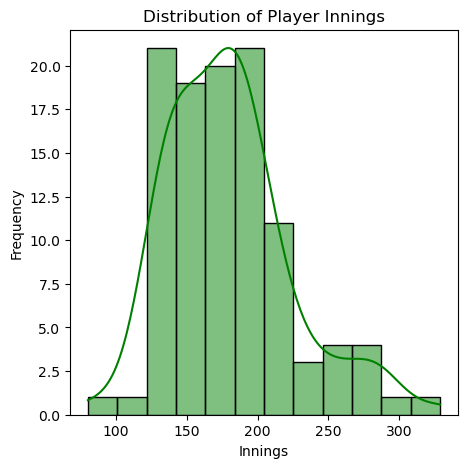

In [15]:
plt.figure(figsize=(5, 5))
sns.histplot(t['Innings'], kde=True,color='green')
plt.title('Distribution of Player Innings')
plt.xlabel('Innings')
plt.ylabel('Frequency')
plt.show()

### Top 10 players with lengthy careers. 

In [16]:
t['Start Year'] = t['Span'].apply(lambda x: int(x.split('-')[0]))
t['End Year'] = t['Span'].apply(lambda x: int(x.split('-')[1]))
t['Span Gap'] = t['End Year'] - t['Start Year']
t[["Names",  "Span Gap"]].sort_values(by="Span Gap", ascending=False).head(10)

,Names,Span Gap
0,SR Tendulkar,24
89,JB Hobbs,22
7,S Chanderpaul,21
39,MC Cowdrey,21
48,WR Hammond,20
56,DG Bradman,20
76,DCS Compton,20
17,GA Gooch,20
33,GS Sobers,20
11,SR Waugh,19


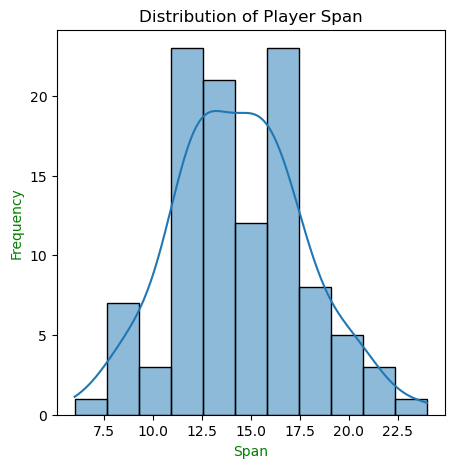

In [17]:
plt.figure(figsize=(5, 5))
sns.histplot(t['Span Gap'], kde=True)
plt.title('Distribution of Player Span')
plt.xlabel('Span',color='green')
plt.ylabel('Frequency',color='green')
plt.show()

### Top 10 players with most batting average 

In [18]:
t[["Names",  "Average"]].sort_values(by="Average", ascending=False).head(10)

,Names,Average
56,DG Bradman,99.94
60,KF Barrington,58.67
48,WR Hammond,58.45
14,SPD Smith,58.03
33,GS Sobers,57.78
5,KC Sangakkara,57.40
89,JB Hobbs,56.94
58,L Hutton,56.67
2,JH Kallis,55.37
29,KS Williamson,54.36


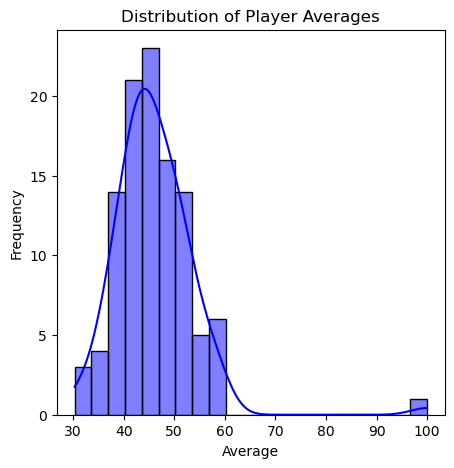

In [19]:
plt.figure(figsize=(5, 5))
sns.histplot(t['Average'], kde=True,color='blue')
plt.title('Distribution of Player Averages')
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.show()

### Top 10 players with most 100 

In [20]:
t[["Names","Hundreds" ]].sort_values(by="Hundreds", ascending=False).head(10)

,Names,Hundreds
0,SR Tendulkar,51
2,JH Kallis,45
1,RT Ponting,41
5,KC Sangakkara,38
3,R Dravid,36
12,SM Gavaskar,34
6,BC Lara,34
8,DPMD Jayawardene,34
13,Younis Khan,34
4,AN Cook,33


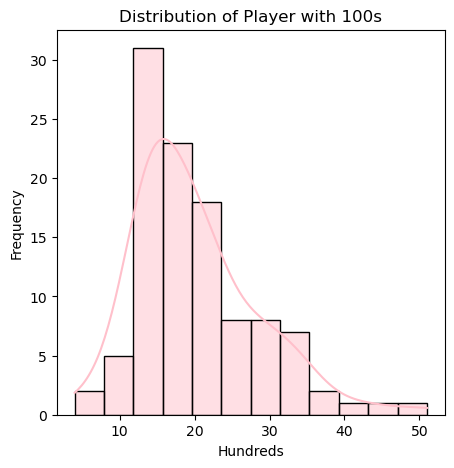

In [21]:
plt.figure(figsize=(5, 5))
sns.histplot(t['Hundreds'],kde=True,color='pink')
plt.title('Distribution of Player with 100s')
plt.xlabel('Hundreds')
plt.ylabel('Frequency')
plt.show()

### Top 10 players with  most 50s

In [22]:
t[['Names','Fifty']].sort_values(by='Fifty',ascending=False).head(10)

,Names,Fifty
0,SR Tendulkar,68
7,S Chanderpaul,66
3,R Dravid,63
10,AR Border,63
1,RT Ponting,62
9,JE Root,60
2,JH Kallis,58
4,AN Cook,57
22,VVS Laxman,56
5,KC Sangakkara,52


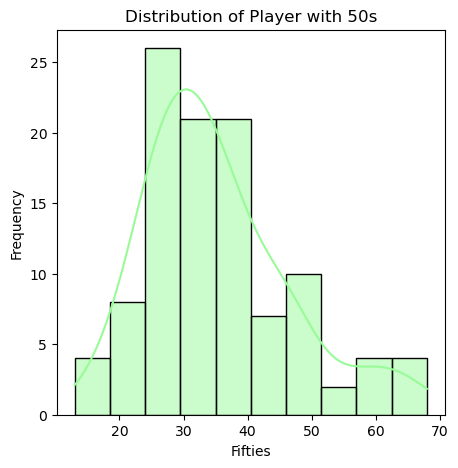

In [23]:
plt.figure(figsize=(5, 5))
sns.histplot(t['Fifty'],kde=True,color='palegreen')
plt.title('Distribution of Player with 50s')
plt.xlabel('Fifties')
plt.ylabel('Frequency')
plt.show()

### Top 10 players with most not outs 

In [24]:
t[["Names", "Not Outs"]].sort_values(by="Not Outs", ascending=False).head(10)

,Names,Not Outs
7,S Chanderpaul,49
11,SR Waugh,46
10,AR Border,44
2,JH Kallis,40
22,VVS Laxman,34
0,SR Tendulkar,33
3,R Dravid,32
1,RT Ponting,29
61,GP Thorpe,28
46,AD Mathews,26


### Top 10 players with Highest Score in a match  

In [25]:
t[["Names", "Highest Score"]].sort_values(by="Highest Score", ascending=False).head(10)

,Names,Highest Score
6,BC Lara,400*
25,ML Hayden,380
8,DPMD Jayawardene,374
33,GS Sobers,365*
58,L Hutton,364
57,ST Jayasuriya,340
48,WR Hammond,336*
21,DA Warner,335*
42,MA Taylor,334*
56,DG Bradman,334


### Top 10 players with highest strike rate 

In [26]:
t[["Names", "Strike Rate"]].sort_values(by="Strike Rate", ascending=False).head(10)

,Names,Strike Rate
26,V Sehwag,82.23
82,AC Gilchrist,81.95
97,N Kapil Dev,79.33
21,DA Warner,70.19
27,IVA Richards,69.77
86,TM Dilshan,65.54
57,ST Jayasuriya,65.18
63,BB McCullum,64.60
31,KP Pietersen,61.72
101,IT Botham,60.71


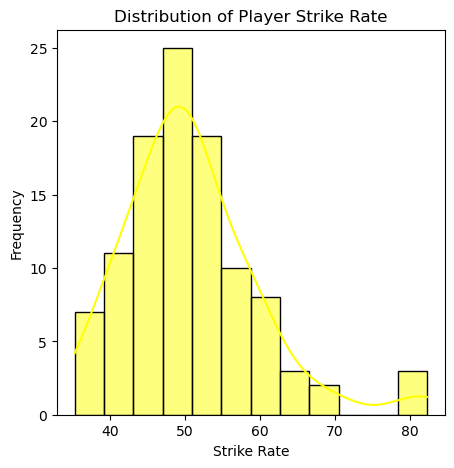

In [27]:
plt.figure(figsize=(5, 5))
sns.histplot(t['Strike Rate'], kde=True,color='yellow')
plt.title('Distribution of Player Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.show()

### Top 10 players with maximum ducks 

In [28]:
t[["Names", "Zeroes"]].sort_values(by="Zeroes", ascending=False).head(10)

,Names,Zeroes
85,MS Atapattu,22
11,SR Waugh,22
35,MA Atherton,20
34,ME Waugh,19
13,Younis Khan,19
53,Azhar Ali,19
6,BC Lara,17
83,MV Boucher,17
1,RT Ponting,17
26,V Sehwag,16


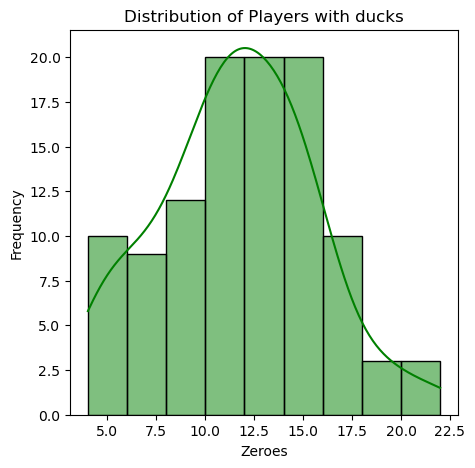

In [29]:
plt.figure(figsize=(5, 5))
sns.histplot(t['Zeroes'],kde=True,color='green')
plt.title('Distribution of Players with ducks')
plt.xlabel('Zeroes')
plt.ylabel('Frequency')
plt.show()

### Top 10 players with most 4s 

In [30]:
t['Fours'] = t['Fours'].str.replace('+', '').astype(int)
t[["Names", "Fours"]].sort_values(by="Fours", ascending=False).head(10)

C:\Users\ankit\AppData\Local\Temp\ipykernel_4372\925949905.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t['Fours'] = t['Fours'].str.replace('+', '').astype(int)


,Names,Fours
0,SR Tendulkar,2058
3,R Dravid,1654
6,BC Lara,1559
1,RT Ponting,1509
5,KC Sangakkara,1491
2,JH Kallis,1488
4,AN Cook,1442
8,DPMD Jayawardene,1387
7,S Chanderpaul,1285
9,JE Root,1248


### Top 10 players with most 6s

In [31]:
t['Sixes'] = t['Sixes'].str.replace('+', '').astype(int)
t[["Names", "Sixes"]].sort_values(by="Sixes", ascending=False).head(10)

C:\Users\ankit\AppData\Local\Temp\ipykernel_4372\2690672312.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t['Sixes'] = t['Sixes'].str.replace('+', '').astype(int)


,Names,Sixes
68,BA Stokes,127
63,BB McCullum,107
82,AC Gilchrist,100
49,CH Gayle,98
2,JH Kallis,97
26,V Sehwag,91
6,BC Lara,88
27,IVA Richards,84
46,AD Mathews,82
25,ML Hayden,82


### Players' Boundary and Six Percentage Analysis

In [32]:
if t['Fours'].dtype == 'O':
    t['Fours'] = t['Fours'].str.replace('*', '').astype(int)  # Remove '*' from number of fours

if t['Sixes'].dtype == 'O':
    t['Sixes'] = t['Sixes'].str.replace('+', '').astype(int)  # Remove '+' from number of sixes

if t['Balls_Faced'].dtype == 'O':
    t['Balls_Faced'] = t['Balls_Faced'].str.replace('+', '').astype(int)  # Remove '+' from number of sixes
# Convert 'Balls_Faced' to numeric type
t['Balls_Faced'] = pd.to_numeric(t['Balls_Faced'], errors='coerce')

# Calculate 'Boundary Percentage' and 'Six Percentage'
t['Boundary Percentage'] = (t['Fours'] + t['Sixes']) / t['Balls_Faced'] * 100
t['Six Percentage'] = t['Sixes'] / t['Balls_Faced'] * 100

boundary_six_percentage = t[['Names','Total Runs' ,'Boundary Percentage', 'Six Percentage']]
print("\nBoundary and Six Percentage Analysis:")
print(boundary_six_percentage)


Boundary and Six Percentage Analysis:
            Names  Total Runs  Boundary Percentage  Six Percentage
0    SR Tendulkar       15921             7.225600        0.234399
1      RT Ponting       13378             6.944079        0.320428
2       JH Kallis       13289             5.483860        0.335605
3        R Dravid       13288             5.358628        0.067183
4         AN Cook       12472             5.470221        0.041413
..            ...         ...                  ...             ...
102     JH Edrich        5138             4.619071        0.090894
103   Tamim Iqbal        5134             7.862630        0.463172
104   A Ranatunga        5105             6.619004        0.461255
105     AM Rahane        5077             5.976989        0.341264
106  Zaheer Abbas        5062             6.921413        0.317231

[107 rows x 4 columns]


C:\Users\ankit\AppData\Local\Temp\ipykernel_4372\2724582182.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  t['Balls_Faced'] = t['Balls_Faced'].str.replace('+', '').astype(int)  # Remove '+' from number of sixes


### Players faced minimum 100 balls in a Innings

In [33]:
t["Balls/Innings"]=t["Balls_Faced"]/t["Innings"]
t[t["Balls/Innings"]>100][['Names',"Balls/Innings"]]

,Names,Balls/Innings
2,JH Kallis,103.225000
3,R Dravid,109.293706
10,AR Border,101.894340
32,G Boycott,106.362694
56,DG Bradman,122.500000


### Average balls faced to score 100 

In [34]:
t['B_100']=t['Balls_Faced']/t['Hundreds']
t[['Names','B_100']].sort_values(by='B_100')

,Names,B_100
70,RN Harvey,85.666667
58,L Hutton,149.684211
33,GS Sobers,156.269231
76,DCS Compton,160.647059
66,RB Kanhai,194.266667
...,...,...
94,JG Wright,1218.250000
35,MA Atherton,1288.062500
52,SP Fleming,1739.111111
104,A Ranatunga,2168.000000


### Players who achieved a century in fewer than six innings

In [35]:
t["100_frequency"]=t["Innings"]/t["Hundreds"]
t[t["100_frequency"]<6][['Names','Hundreds',"100_frequency"]]

,Names,Hundreds,100_frequency
14,SPD Smith,32,5.968750
29,KS Williamson,29,5.793103
56,DG Bradman,29,2.758621


### Frequency of 50 

In [36]:
t["50_frequency(innings)"]=t["Innings"]/t["Fifty"]
t[t["50_frequency(innings)"]<6][['Names','Fifty',"50_frequency(innings)"]]

,Names,Fifty,50_frequency(innings)
0,SR Tendulkar,68,4.838235
1,RT Ponting,62,4.629032
2,JH Kallis,58,4.827586
3,R Dravid,63,4.539683
4,AN Cook,57,5.105263
...,...,...,...
100,TWM Latham,27,4.962963
102,JH Edrich,24,5.291667
103,Tamim Iqbal,31,4.322581
104,A Ranatunga,38,4.078947


### Players with minimum five fours per innings

In [37]:
t["Fours/Innings"]=t["Fours"]/t["Innings"]
t[t["Fours/Innings"]>5][['Names',"Fours/Innings"]]

,Names,Fours/Innings
0,SR Tendulkar,6.255319
1,RT Ponting,5.257840
2,JH Kallis,5.314286
3,R Dravid,5.783217
5,KC Sangakkara,6.399142
6,BC Lara,6.719828
8,DPMD Jayawardene,5.503968
9,JE Root,5.012048
13,Younis Khan,5.079812
14,SPD Smith,5.528796


###  Players played balls for  boundary

In [38]:
t["Balls/Fours"]=t["Balls_Faced"]/t["Fours"]
t[["Names","Balls/Fours"]].sort_values(by="Balls/Fours")

,Names,Balls/Fours
70,RN Harvey,4.213115
66,RB Kanhai,5.934827
33,GS Sobers,6.851602
58,L Hutton,7.944134
76,DCS Compton,7.985380
...,...,...
94,JG Wright,23.541063
53,Azhar Ali,24.543228
84,KC Brathwaite,24.816364
42,MA Taylor,24.951857


### Players faced balls for  six

In [39]:
t["Balls/Sixes"]=t["Balls_Faced"]/t["Sixes"]
t[["Names","Balls/Sixes"]].sort_values(by="Balls/Sixes")

,Names,Balls/Sixes
82,AC Gilchrist,67.960000
68,BA Stokes,82.330709
97,N Kapil Dev,85.114754
63,BB McCullum,93.355140
43,CH Lloyd,99.171429
...,...,...
32,G Boycott,2566.000000
85,MS Atapattu,3096.000000
22,VVS Laxman,3557.000000
35,MA Atherton,5152.250000


### Players frequency for ducks

In [40]:
t["ducks_frequency(innings)"]=t["Innings"]/t['Zeroes']
t[["Names","ducks_frequency(innings)"]].sort_values(by="ducks_frequency(innings)")

,Names,ducks_frequency(innings)
85,MS Atapattu,7.090909
53,Azhar Ali,9.473684
82,AC Gilchrist,9.785714
86,TM Dilshan,10.357143
35,MA Atherton,10.600000
...,...,...
48,WR Hammond,35.000000
3,R Dravid,35.750000
42,MA Taylor,37.200000
46,AD Mathews,37.600000


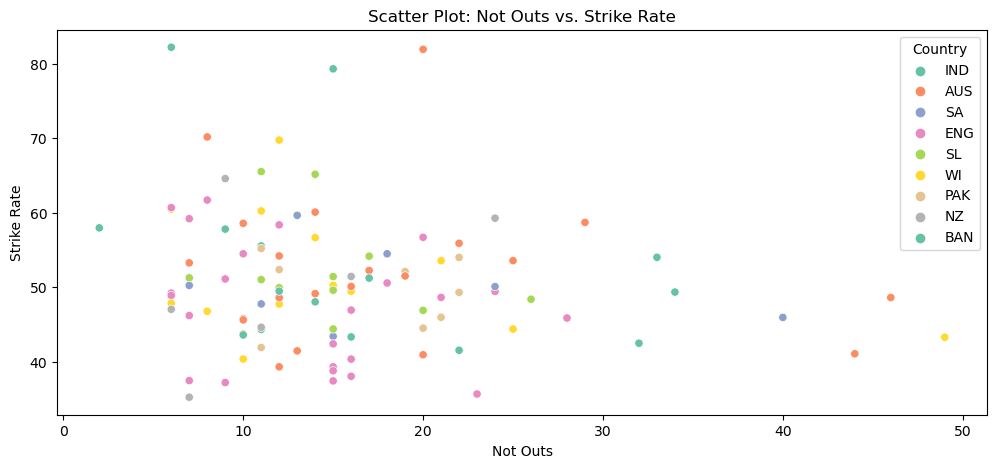

In [41]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Not Outs', y='Strike Rate', data=t, hue='Country', palette='Set2')
plt.title('Scatter Plot: Not Outs vs. Strike Rate')
plt.show()

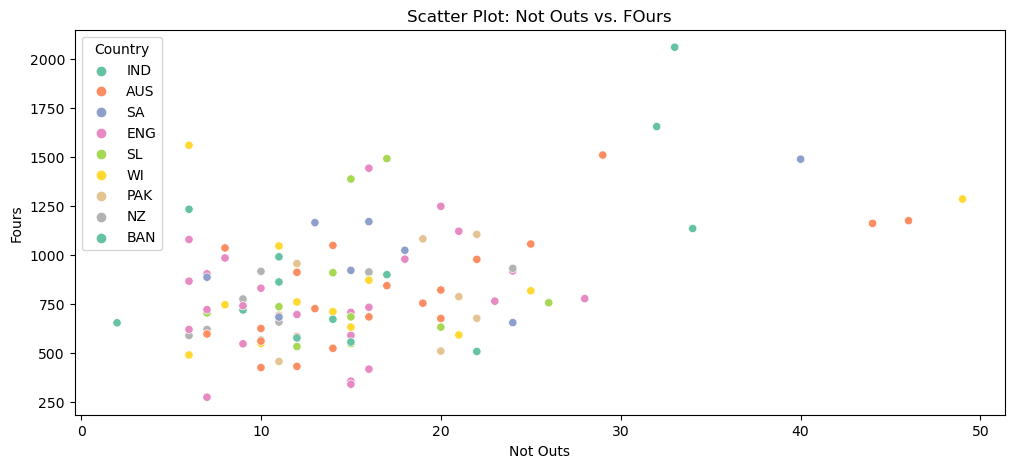

In [42]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Not Outs', y='Fours', data=t, hue='Country', palette='Set2')
plt.title('Scatter Plot: Not Outs vs. FOurs')
plt.show()

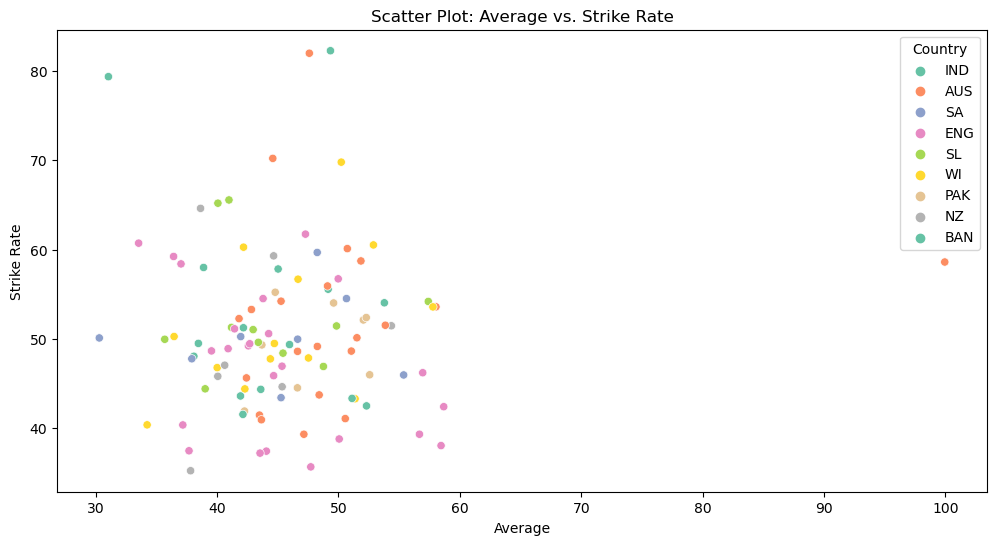

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average', y='Strike Rate', data=t, hue='Country', palette='Set2')
plt.title('Scatter Plot: Average vs. Strike Rate')
plt.show()

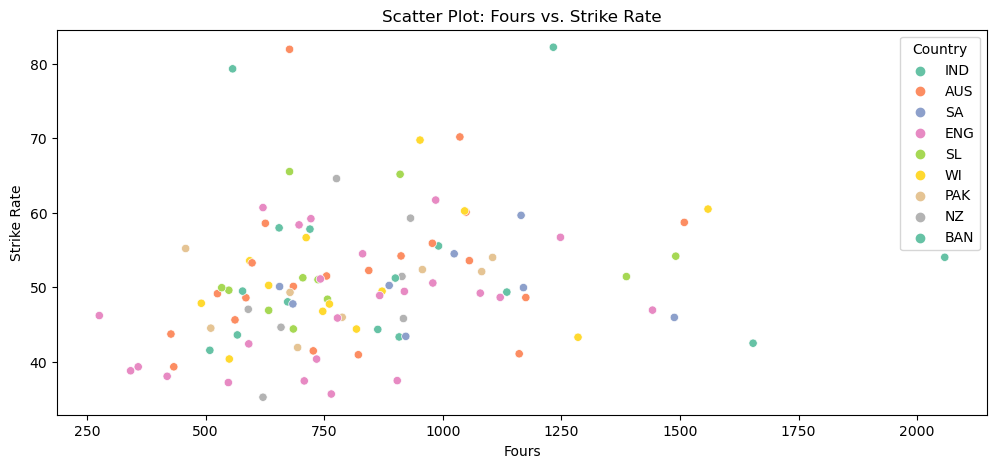

In [44]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Fours', y='Strike Rate', data=t, hue='Country', palette='Set2')
plt.title('Scatter Plot: Fours vs. Strike Rate')
plt.show()

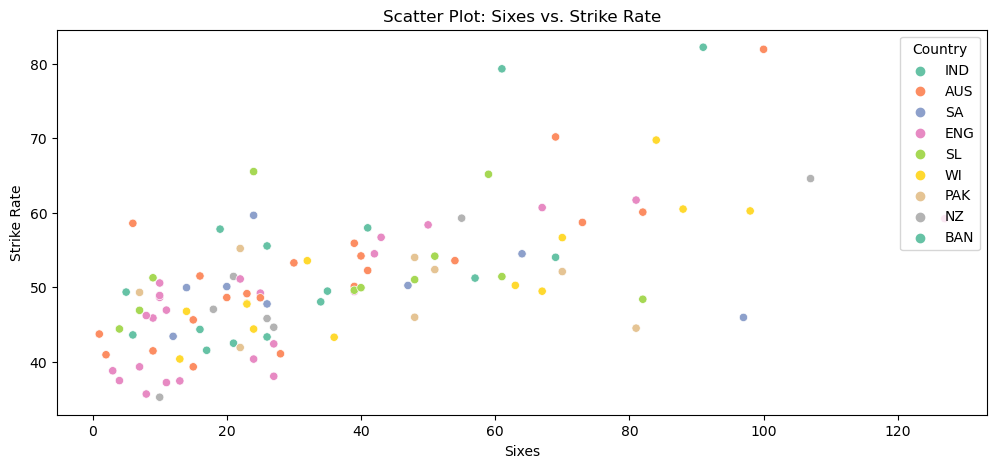

In [45]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Sixes', y='Strike Rate', data=t, hue='Country', palette='Set2')
plt.title('Scatter Plot: Sixes vs. Strike Rate')
plt.show()

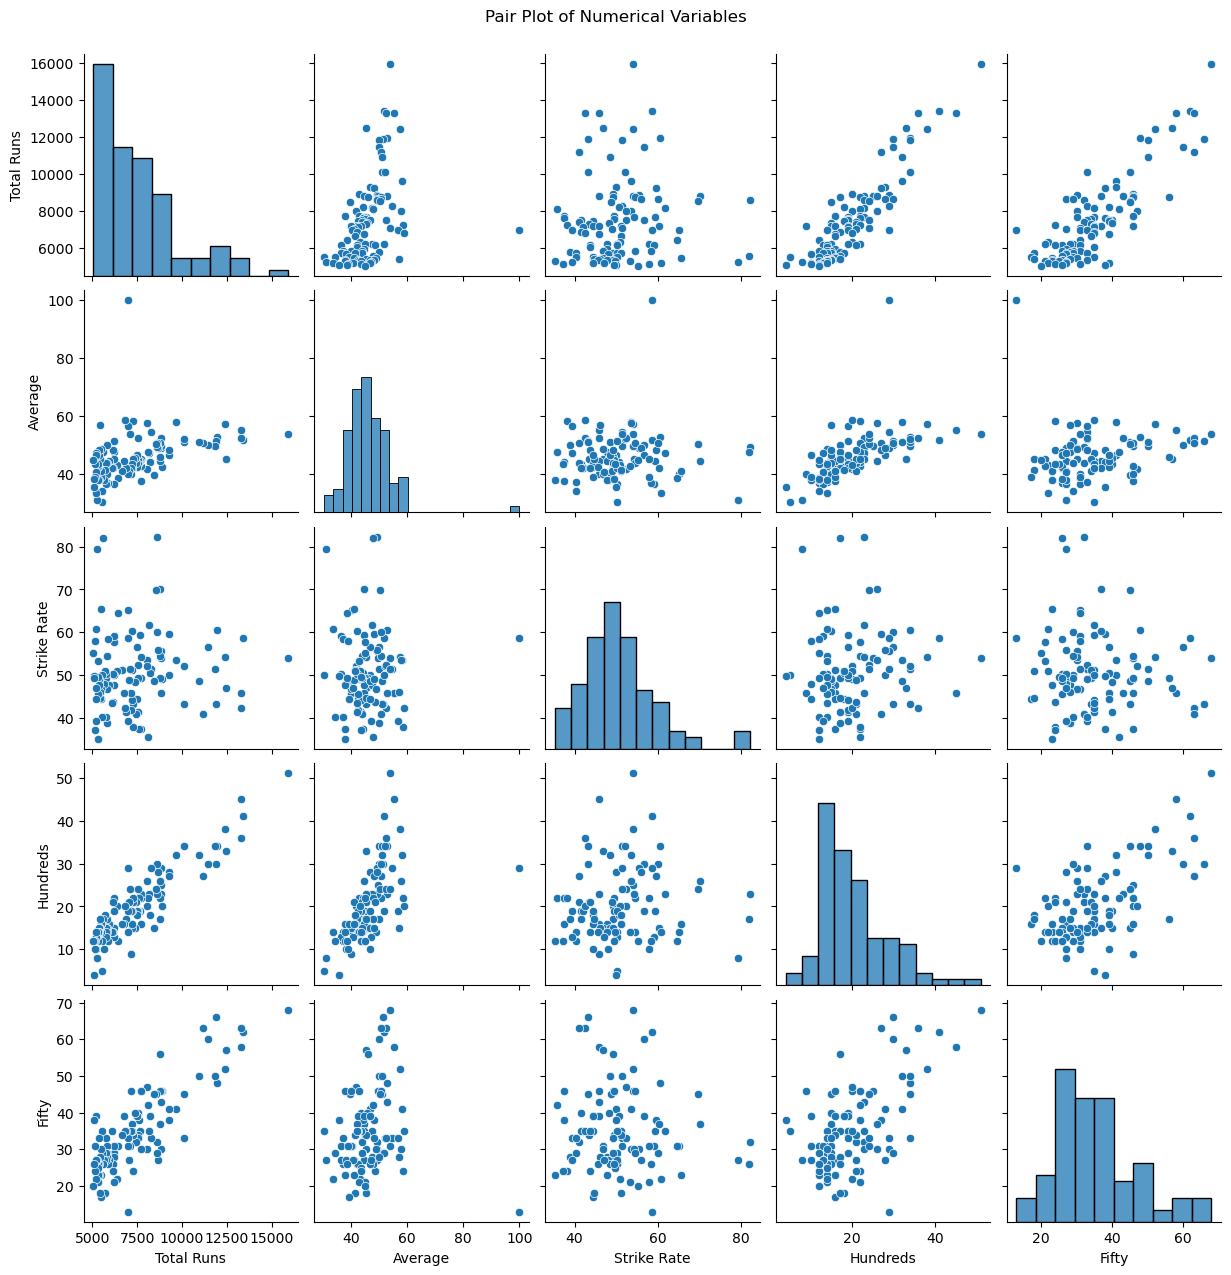

In [46]:
numerical_vars = ['Total Runs', 'Average', 'Strike Rate', 'Hundreds', 'Fifty']
sns.pairplot(t[numerical_vars])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

C:\Users\ankit\AppData\Local\Temp\ipykernel_4372\735822471.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = t.corr()


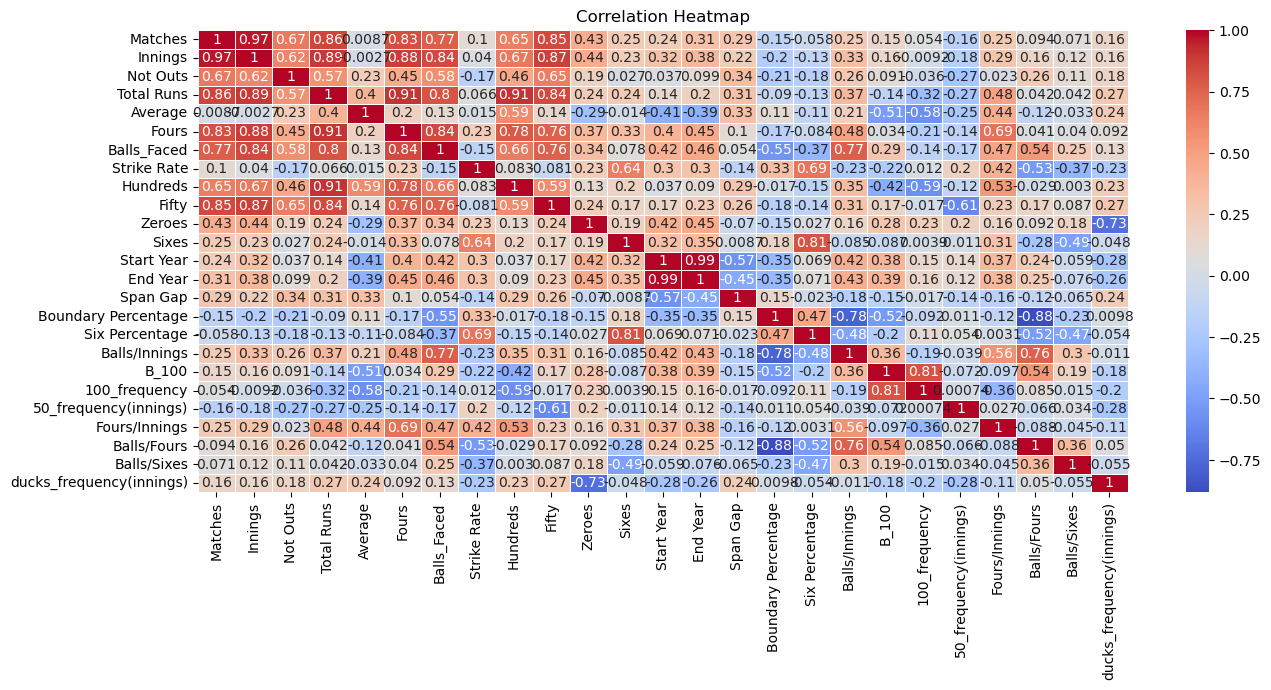

In [47]:
correlation_matrix = t.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

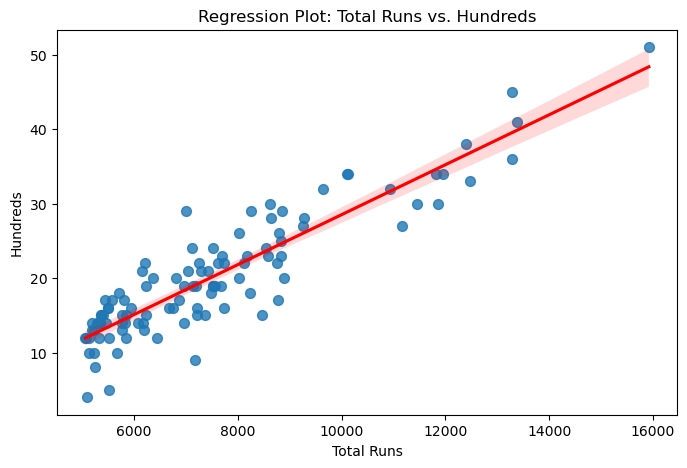

In [48]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Total Runs', y='Hundreds', data=t, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Total Runs vs. Hundreds')
plt.show()

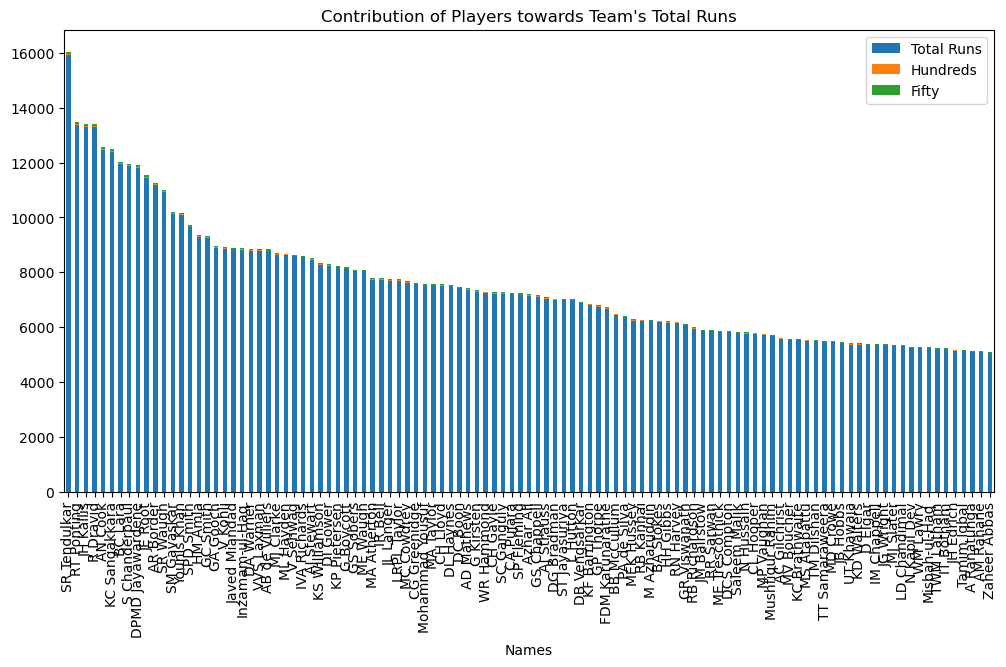

In [49]:
team_contribution = t[['Names', 'Total Runs', 'Hundreds', 'Fifty']]
team_contribution.set_index('Names').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Contribution of Players towards Team's Total Runs")
plt.show()

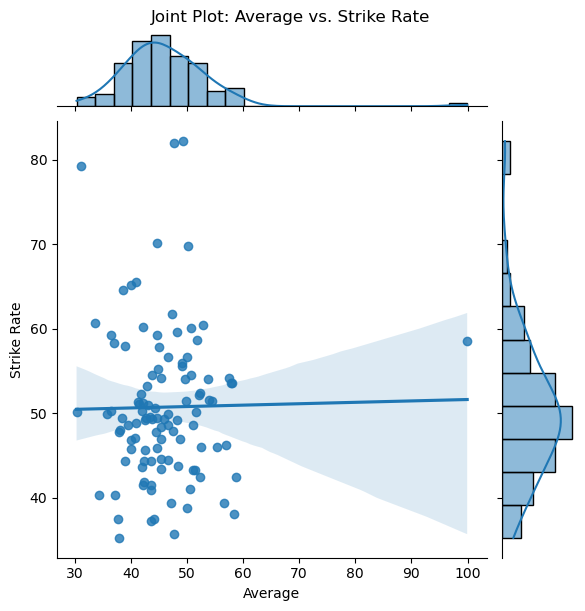

In [50]:
sns.jointplot(x='Average', y='Strike Rate', data=t, kind='reg')
plt.suptitle('Joint Plot: Average vs. Strike Rate',y=1.01)
plt.show()